In [22]:
import pandas as pd
import numpy as np


In [23]:
mutations = pd.read_table('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/Data/original/TCGA.HNSC.mutations.txt')
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,SIFT,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS
0,TCGA-4P-AA8J,PIP4K2A,0,.,GRCh37,10,22830863,22830863,+,Silent,...,.,.,"Low_complexity_(Seg):seg,PROSITE_profiles:PS51...",LOW,SNV,common_in_exac,NONE,MUTECT|VARSCANS,CTCTCGCCCTC,2
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,.,.,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,.,.,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,tolerated_low_confidence(0.77),benign(0),"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,tolerated(0.07),possibly_damaging(0.847),"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,.,.,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4
124847,TCGA-WA-A7H4,RDH10,0,.,GRCh37,8,74235183,74235183,+,Missense_Mutation,...,tolerated(0.2),possibly_damaging(0.504),"hmmpanther:PTHR24316:SF309,hmmpanther:PTHR2431...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE,GTATCGGTTCC,2
124848,TCGA-WA-A7H4,FAM154A,0,.,GRCh37,9,18927993,18927993,+,3'UTR,...,.,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|MUSE,ATAATTCTCAG,2


In [24]:
len(mutations['patient_id'].unique())


500

In [25]:
mutations['FILTER'].value_counts()


PASS                               105976
nonpreferredpair                    11519
oxog                                 5690
nonpreferredpair,oxog                1005
common_in_exac                        589
common_in_exac,nonpreferredpair        69
common_in_exac,oxog                     2
Name: FILTER, dtype: int64

In [26]:
mutations = mutations[mutations['FILTER'] == 'PASS']
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,SIFT,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,.,.,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,.,.,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,tolerated_low_confidence(0.77),benign(0),"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,.,.,"PROSITE_profiles:PS51233,hmmpanther:PTHR11339,...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,tolerated(0.07),possibly_damaging(0.847),"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,.,.,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4
124847,TCGA-WA-A7H4,RDH10,0,.,GRCh37,8,74235183,74235183,+,Missense_Mutation,...,tolerated(0.2),possibly_damaging(0.504),"hmmpanther:PTHR24316:SF309,hmmpanther:PTHR2431...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE,GTATCGGTTCC,2
124848,TCGA-WA-A7H4,FAM154A,0,.,GRCh37,9,18927993,18927993,+,3'UTR,...,.,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|MUSE,ATAATTCTCAG,2


In [27]:
mutations['VARIANT_CLASS'].value_counts()


SNV             102378
deletion          2488
insertion          981
substitution       129
Name: VARIANT_CLASS, dtype: int64

In [28]:
# check the row where mutations['NCALLERS'] is max
mutations['NCALLERS'].max()
mutations[mutations['NCALLERS'] == 7]


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,SIFT,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS
27608,TCGA-CN-A641,NSD1,0,.,GRCh37,5,176707784,176707786,+,Frame_Shift_Ins,...,.,.,"PROSITE_profiles:PS50280,hmmpanther:PTHR22884,...",HIGH,substitution,PASS,NONE,PINDEL|SOMATICSNIPER*|VARSCANI*|INDELOCATOR*|M...,AATTTTCCGCACAT,7
33858,TCGA-CQ-A4CG,DGAT2L6,0,.,GRCh37,X,69420163,69420163,+,Frame_Shift_Ins,...,.,.,"hmmpanther:PTHR12317:SF11,hmmpanther:PTHR12317...",HIGH,substitution,PASS,NONE,PINDEL|SOMATICSNIPER*|VARSCANI*|INDELOCATOR*|M...,ACCCCCATGGCA,7


In [29]:
# from mutations['CALLERS'], remove str matching 'RADIA' and 'SOMATICSNIPER'
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='*', value='')
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='RADIA', value='')
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='SOMATICSNIPER', value='')
# in mutations['CALLERS'], if 2 '|' are next to each other, replace with ''
mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='\\|\\|', value='', regex=True)


/var/folders/dr/_r18syxx1yd9jgt5prvtlwcr0000gn/T/ipykernel_9233/1903667577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='*', value='')
/var/folders/dr/_r18syxx1yd9jgt5prvtlwcr0000gn/T/ipykernel_9233/1903667577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutations['CALLERS'] = mutations['CALLERS'].replace(to_replace='RADIA', value='')
/var/folders/dr/_r18syxx1yd9jgt5prvtlwcr0000gn/T/ipykernel_9233/1903667577.py:4: SettingWithCopyWa

In [30]:
# count the number of '|' in mutations['CALLERS'] and store in a new column 'CALLERS_COUNT_ADJUSTED'
mutations['CALLERS_COUNT_ADJUSTED'] = mutations['CALLERS'].str.count('\\|')


/var/folders/dr/_r18syxx1yd9jgt5prvtlwcr0000gn/T/ipykernel_9233/3390343306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutations['CALLERS_COUNT_ADJUSTED'] = mutations['CALLERS'].str.count('\\|')


<Axes: >

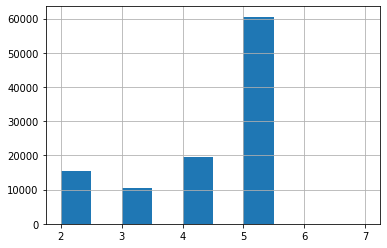

In [31]:
mutations['NCALLERS'].hist()


In [32]:
mutations = mutations[mutations['CALLERS_COUNT_ADJUSTED'] > 1]
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,.,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,.,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,benign(0),"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,.,"PROSITE_profiles:PS51233,hmmpanther:PTHR11339,...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,.,"Low_complexity_(Seg):seg,Transmembrane_helices...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,benign(0.022),"hmmpanther:PTHR31345,hmmpanther:PTHR31345:SF2,...",MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,possibly_damaging(0.847),"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,.,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3


<Axes: >

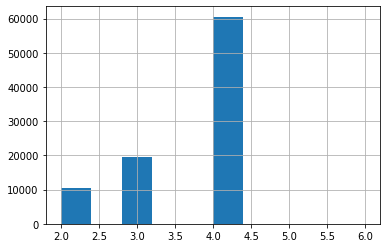

In [33]:
# plot a distribution of number of NCALLERS
mutations['CALLERS_COUNT_ADJUSTED'].hist()


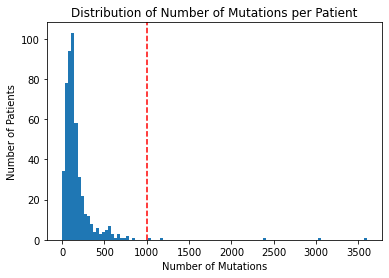

In [34]:

# make a line at 1000 
import matplotlib.pyplot as plt
plt.axvline(x=1000, color='r', linestyle='--')
mutations['patient_id'].value_counts().hist(bins=100) 
plt.xlabel('Number of Mutations')
plt.ylabel('Number of Patients')
plt.title('Distribution of Number of Mutations per Patient')
plt.grid(None)
plt.show()


In [ ]:
len(mutations['Hugo_Symbol'].unique())


17165

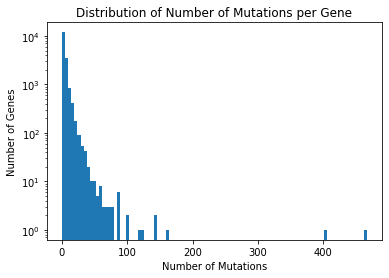

In [49]:
import matplotlib.pyplot as plt
from py import log
#plt.axvline(x=1000, color='r', linestyle='--')
mutations['Hugo_Symbol'].value_counts().hist(bins=100, log=True) 
plt.xlabel('Number of Mutations')
plt.ylabel('Number of Genes')
plt.title('Distribution of Number of Mutations per Gene')
plt.grid(None)
plt.show()


In [ ]:
mutations.columns


Index(['patient_id', 'Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build',
       'Chromosome', 'Start_Position', 'End_Position', 'Strand',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'HGVSc',
       'HGVSp', 'Transcript_ID', 't_depth', 't_ref_count', 't_alt_count',
       'n_depth', 'Allele', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'STRAND', 'CANONICAL', 'CCDS', 'ENSP', 'SWISSPROT', 'TREMBL', 'UNIPARC',
       'SIFT', 'PolyPhen', 'DOMAINS', 'IMPACT', 'VARIANT_CLASS', 'FILTER',
       'COSMIC', 'CALLERS', 'CONTEXT', 'NCALLERS', 'CALLERS_COUNT_ADJUSTED',
       'VAF'],
      dtype='object')

In [ ]:
mutations['VAF'] = mutations['t_alt_count'] / mutations['t_depth'] 
mutations 


/var/folders/dr/_r18syxx1yd9jgt5prvtlwcr0000gn/T/ipykernel_9233/529390874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutations['VAF'] = mutations['t_alt_count'] / mutations['t_depth']


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED,VAF
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4,0.200000
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3,0.146341
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3,0.145833
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2,0.109589
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,"PROSITE_profiles:PS51233,hmmpanther:PTHR11339,...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,"Low_complexity_(Seg):seg,Transmembrane_helices...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3,0.092896
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,"hmmpanther:PTHR31345,hmmpanther:PTHR31345:SF2,...",MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3,0.110236
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2,0.089552
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3,0.136986


<Axes: >

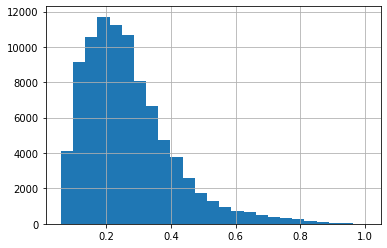

In [36]:
mutations['VAF'].hist(bins=25)


In [37]:
mutations = mutations[mutations['n_depth'] >= 10] 
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED,VAF
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4,0.200000
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3,0.146341
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3,0.145833
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2,0.109589
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,"PROSITE_profiles:PS51233,hmmpanther:PTHR11339,...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,"Low_complexity_(Seg):seg,Transmembrane_helices...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3,0.092896
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,"hmmpanther:PTHR31345,hmmpanther:PTHR31345:SF2,...",MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3,0.110236
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2,0.089552
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3,0.136986


In [38]:
mutations['patient_id'].value_counts().head(10)


TCGA-F7-A624    3581
TCGA-CV-7568    3031
TCGA-D6-6516    2384
TCGA-CR-7402    1168
TCGA-CN-4723    1014
TCGA-BA-A6DA     835
TCGA-CV-A6K2     778
TCGA-TN-A7HL     760
TCGA-CV-A461     717
TCGA-CR-7388     713
Name: patient_id, dtype: int64

In [ ]:
mutations['Variant_Classification'].value_counts()


Missense_Mutation         52583
Silent                    21020
Nonsense_Mutation          4268
3'UTR                      3086
Intron                     2319
5'UTR                      1614
Frame_Shift_Del            1573
Splice_Site                1287
RNA                        1021
Frame_Shift_Ins             668
3'Flank                     290
5'Flank                     279
In_Frame_Del                257
Translation_Start_Site       79
Nonstop_Mutation             52
In_Frame_Ins                 18
Name: Variant_Classification, dtype: int64

Text(0.5, 1.0, 'Distribution of Variant Classification')

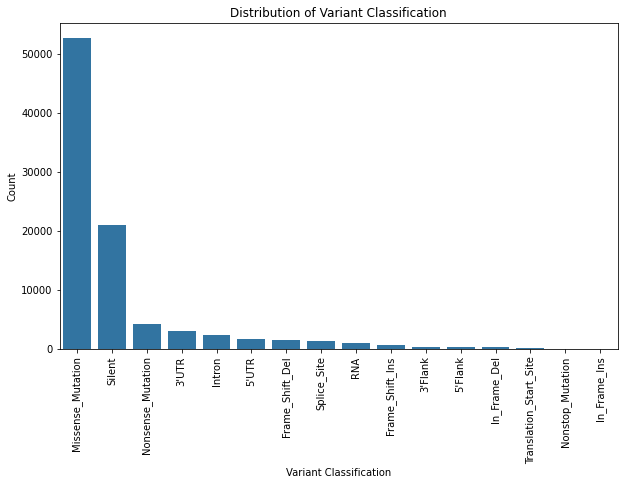

In [42]:
# make bar plot from mutations['Variant_Classification'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=mutations, x='Variant_Classification', order=mutations['Variant_Classification'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Variant Classification')
plt.ylabel('Count')
plt.title('Distribution of Variant Classification')


<Axes: >

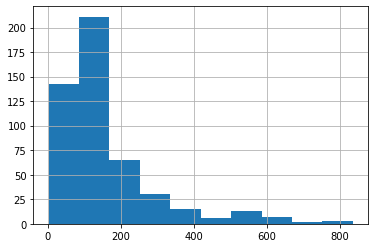

In [ ]:
mutations['patient_id'].value_counts().hist()


In [22]:
# remove patiant_id TCGA-F7-A624,TCGA-CV-7568,TCGA-D6-6516,TCGA-CN-6010,TCGA-CV-6961,TCGA-CV-7245,TCGA-CR-7402,TCGA-CN-4723,TCGA-CR-7388
mutations = mutations[~mutations['patient_id'].isin(['TCGA-F7-A624','TCGA-CV-7568','TCGA-D6-6516','TCGA-CR-7402','TCGA-CN-4723'])]
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED,VAF
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,.,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4,0.200000
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,"Superfamily_domains:SSF52540,PIRSF_domain:PIRS...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3,0.146341
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,"hmmpanther:PTHR18914:SF22,hmmpanther:PTHR18914...",LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3,0.145833
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,"hmmpanther:PTHR22100:SF13,hmmpanther:PTHR22100",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2,0.109589
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,"PROSITE_profiles:PS51233,hmmpanther:PTHR11339,...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,"Low_complexity_(Seg):seg,Transmembrane_helices...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3,0.092896
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,"hmmpanther:PTHR31345,hmmpanther:PTHR31345:SF2,...",MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3,0.110236
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,"PROSITE_profiles:PS50192,hmmpanther:PTHR19957:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2,0.089552
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,"hmmpanther:PTHR13711,hmmpanther:PTHR13711:SF15...",LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3,0.136986


In [ ]:
len(mutations['patient_id'].unique())


494

In [23]:
# add gene length information
genes = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/Data/annotations/gene_length.csv')
genes


,query,_id,_score,genomic_pos,notfound,length,total_length
0,PIP4K2A,5305,18.278242,"{'chr': '10', 'end': 22714578, 'ensemblgene': ...",NaN,179724.0,179724.0
1,NRP1,8829,18.117056,"{'chr': '10', 'end': 33336262, 'ensemblgene': ...",NaN,158770.0,158770.0
2,PFKFB3,5209,17.630830,"{'chr': '10', 'end': 6254644, 'ensemblgene': '...",NaN,109710.0,109710.0
3,VCL,7414,18.117056,"{'chr': '10', 'end': 74121363, 'ensemblgene': ...",NaN,126170.0,126170.0
4,MUC2,4583,18.525637,"[{'chr': '11', 'end': 1110511, 'ensemblgene': ...",NaN,101655.0,101655.0
...,...,...,...,...,...,...,...
16898,SNORD116-9,100033421,27.201292,"{'chr': '15', 'end': 25073201, 'ensemblgene': ...",NaN,94.0,94.0
16899,SNORD116-13,100033425,27.201292,"{'chr': '15', 'end': 25079149, 'ensemblgene': ...",NaN,91.0,91.0
16900,ZNHIT3,9326,17.598894,"[{'chr': '17', 'end': 36499310, 'ensemblgene':...",NaN,25362.0,25362.0
16901,GS1-24F4.2,100652791,27.201292,"[{'chr': '8', 'end': 6885358, 'ensemblgene': '...",NaN,99549.0,99549.0


In [24]:
# check if genes is uniquely indexed by 'query'
genes = genes.set_index('query')
genes


,_id,_score,genomic_pos,notfound,length,total_length
query,,,,,,
PIP4K2A,5305,18.278242,"{'chr': '10', 'end': 22714578, 'ensemblgene': ...",NaN,179724.0,179724.0
NRP1,8829,18.117056,"{'chr': '10', 'end': 33336262, 'ensemblgene': ...",NaN,158770.0,158770.0
PFKFB3,5209,17.630830,"{'chr': '10', 'end': 6254644, 'ensemblgene': '...",NaN,109710.0,109710.0
VCL,7414,18.117056,"{'chr': '10', 'end': 74121363, 'ensemblgene': ...",NaN,126170.0,126170.0
MUC2,4583,18.525637,"[{'chr': '11', 'end': 1110511, 'ensemblgene': ...",NaN,101655.0,101655.0
...,...,...,...,...,...,...
SNORD116-9,100033421,27.201292,"{'chr': '15', 'end': 25073201, 'ensemblgene': ...",NaN,94.0,94.0
SNORD116-13,100033425,27.201292,"{'chr': '15', 'end': 25079149, 'ensemblgene': ...",NaN,91.0,91.0
ZNHIT3,9326,17.598894,"[{'chr': '17', 'end': 36499310, 'ensemblgene':...",NaN,25362.0,25362.0


In [25]:
mutations['gene_length'] = mutations['Hugo_Symbol'].apply(lambda x: genes.loc[x]['length'] if x in genes.index else np.nan)
mutations


/var/folders/dr/_r18syxx1yd9jgt5prvtlwcr0000gn/T/ipykernel_76576/3571251606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutations['gene_length'] = mutations['Hugo_Symbol'].apply(lambda x: genes.loc[x]['length'] if x in genes.index else np.nan)


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED,VAF,gene_length
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4,0.200000,158770.0
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3,0.146341,109710.0
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3,0.145833,126170.0
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2,0.109589,NaN
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3,0.157895,101655.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3,0.092896,2362.0
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3,0.110236,29737.0
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2,0.089552,191102.0
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3,0.136986,313735.0


In [26]:
mutations


,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,CALLERS_COUNT_ADJUSTED,VAF,gene_length
1,TCGA-4P-AA8J,NRP1,0,.,GRCh37,10,33495214,33495214,+,Intron,...,MODIFIER,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CATCTCTTCTT,5,4,0.200000,158770.0
2,TCGA-4P-AA8J,PFKFB3,0,.,GRCh37,10,6257188,6257188,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,GTGTTCAACGT,4,3,0.146341,109710.0
3,TCGA-4P-AA8J,VCL,0,.,GRCh37,10,75849918,75849918,+,Silent,...,LOW,SNV,PASS,BUFFER|p.A440D|c.1319C>A|3,RADIA|MUTECT|MUSE|VARSCANS,GAAATATCTGC,4,3,0.145833,126170.0
4,TCGA-4P-AA8J,WAPAL,0,.,GRCh37,10,88260246,88260246,+,Missense_Mutation,...,MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,TAAAATACAGT,3,2,0.109589,NaN
5,TCGA-4P-AA8J,MUC2,0,.,GRCh37,11,1080567,1080567,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCGATGGGAA,4,3,0.157895,101655.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124838,TCGA-WA-A7H4,CLPS,0,.,GRCh37,6,35765036,35765036,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,AGGGCGACAAG,4,3,0.092896,2362.0
124840,TCGA-WA-A7H4,CENPQ,0,.,GRCh37,6,49448713,49448713,+,Missense_Mutation,...,MODERATE,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TGGAAGATTTA,4,3,0.110236,29737.0
124845,TCGA-WA-A7H4,TSNARE1,0,.,GRCh37,8,143381872,143381872,+,Missense_Mutation,...,MODERATE,SNV,PASS,NONE,MUTECT|MUSE|VARSCANS,CCTCCCGCAGC,3,2,0.089552,191102.0
124846,TCGA-WA-A7H4,TOX,0,.,GRCh37,8,59728263,59728263,+,Silent,...,LOW,SNV,PASS,NONE,RADIA|MUTECT|MUSE|VARSCANS,TTCACGTCAAC,4,3,0.136986,313735.0


In [27]:
mutations.to_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_2/project_2_data/TCGA_HNSC_mutations_cleaned.txt', index=False, sep='\t')


In [28]:
missing_genes = mutations[mutations['gene_length'].isna()]['Hugo_Symbol'].unique()
len(missing_genes) 


1244

In [29]:
# filter out genes that contains 'orf', or start with 'HIST' or start with 'MIR'/'KIAA'/'FAM'/'LOC'/'RP11-'/'LINC'
missing_genes = [gene for gene in missing_genes if not (gene.startswith('HIST') or gene.startswith('MIR') or gene.startswith('KIAA') or gene.startswith('FAM') or gene.startswith('LOC') or gene.startswith('RP11-') or gene.startswith('LINC'))]
# filter out genes that start with 'sno', or in the format AL445989.1 
missing_genes = [gene for gene in missing_genes if not (gene.startswith('sno') or gene.startswith('AL') or gene.startswith('AC') or gene.startswith('NR') or gene.startswith('XR') or gene.startswith('XM'))]
len(missing_genes)


895

In [30]:
missing_genes


['WAPAL',
 'SRPR',
 'ZNF724P',
 'PTCHD2',
 'SSFA2',
 'C2orf53',
 'BAI1',
 'TMEM2',
 'SEPT12',
 'PPAP2B',
 'LPHN2',
 'PCDP1',
 'GPR115',
 'BAI3',
 'ZNF259',
 'MAATS1',
 'C6orf48',
 'C8orf59',
 'ARMC4',
 'ADRBK1',
 'ARNTL2',
 'CIRH1A',
 'TBC1D27',
 'NOTCH2NL',
 'OR2W5',
 'C1orf168',
 'C1orf173',
 'GPR128',
 'C3orf84',
 'C4orf3',
 'FYB',
 'GPR116',
 'CCDC132',
 'CCDC64',
 'PCNX',
 'CRAMP1L',
 'MYLPF',
 'MARCH10',
 'C18orf21',
 'MARCH7',
 'GPR113',
 'CRIPAK',
 'MLLT4',
 'NAPRT1',
 'C9orf131',
 'MGEA5',
 'ADAL',
 'C16orf70',
 'C1orf158',
 'C1orf65',
 'LPPR5',
 'C20orf26',
 'SPATA5',
 'GUCY1A3',
 'C4orf45',
 'C5orf38',
 'GPR98',
 'GBAS',
 'C7orf26',
 'PALM2-AKAP2',
 'TMEM8C',
 'IARS',
 'BHLHB9',
 'GPR112',
 'CCBL2',
 'PROL1',
 'C6ORF165',
 'C10orf111',
 'KDELC2',
 'SSPO',
 'CCDC147',
 'FBXO18',
 'C12orf45',
 'C12orf49',
 'RP13-977J11.5',
 'C12orf39',
 'ATP5G2',
 'METTL21B',
 'SPATA5L1',
 'CCDC135',
 'LRRC48',
 'TBC1D29',
 'SEPT9',
 'SUV420H2',
 'UFD1L',
 'H1F0',
 'TTC30B',
 'C2orf62',
 'C2or